# Loading the Libraries that we will Use

# List of all the Fields:
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

Type of glass: (class attribute) 1 building_windows_float_processed 2 building_windows_non_float_processed 3 vehicle_windows_float_processed 4 vehicle_windows_non_float_processed (none in this database) 5 containers 6 tableware 7 headlamps



In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
from subprocess import check_output

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Data

In [11]:
glass = pd.read_csv('glass.csv')

In [15]:
glass.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# Cleaning Up and Checking for Null Values

In [16]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


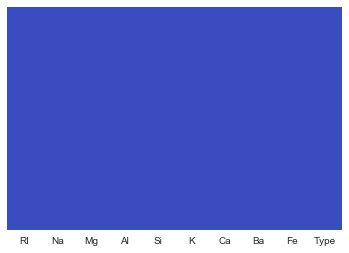

In [17]:
sns.heatmap(glass.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [18]:
X = glass.drop(['Type'], axis=1)
Y = glass['Type']

In [19]:
glass.corr()['Type'].abs().sort_values(ascending=False)

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

# Machine Learning Tools

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import math

In [21]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, Y, test_size=0.30, random_state=153)

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"]
              , "min_samples_leaf" : [1, 5, 10]
              , "min_samples_split" : [2, 4, 10, 12, 16]
              , "n_estimators": [100, 125, 200]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X_tr, y_tr)

In [23]:
print(gs.best_score_)
print(gs.best_params_)

0.785234899329
{'criterion': 'gini', 'n_estimators': 200, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Random Forest Classifier

In [24]:
rf = RandomForestClassifier( criterion='entropy', 
                             n_estimators=200,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rf.fit(X_tr, y_tr)
pred = rf.predict(X_ts)

score = rf.score(X_ts, y_ts)
err = math.sqrt(((pred - y_ts)**2).mean())
print("Error: %.3f Score: %.3f" % (err, score))

Error: 1.253 Score: 0.708


In [25]:
pd.concat((pd.DataFrame(X.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
2,Mg,0.242187
3,Al,0.158750
6,Ca,0.118455
7,Ba,0.113829
0,RI,0.110221
1,Na,0.091497
5,K,0.076913
4,Si,0.065784
8,Fe,0.022365


# Calculating Skewness

In [26]:
from sklearn import preprocessing
from scipy.stats import skew
from scipy.stats import boxcox

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


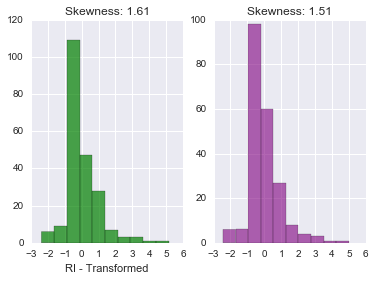

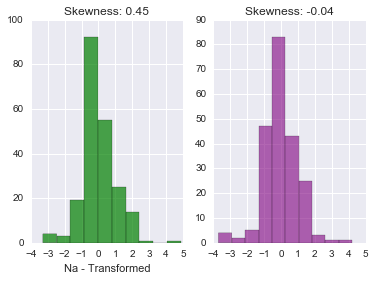

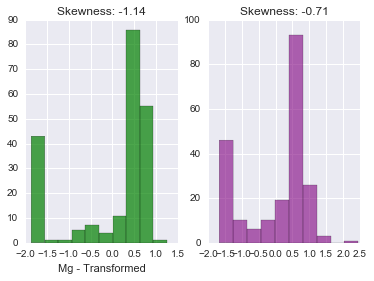

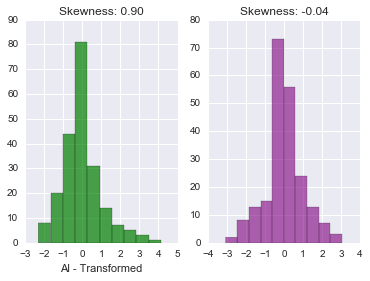

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


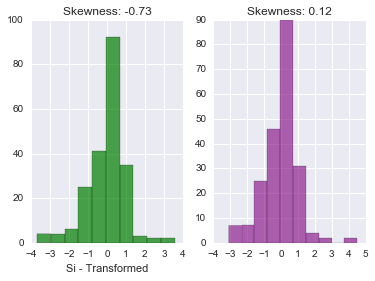

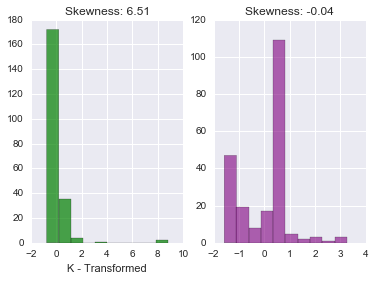

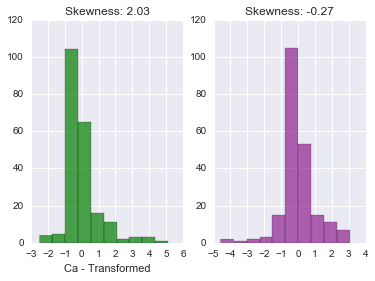

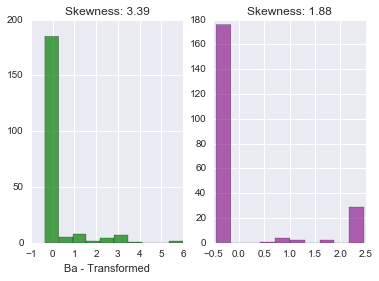

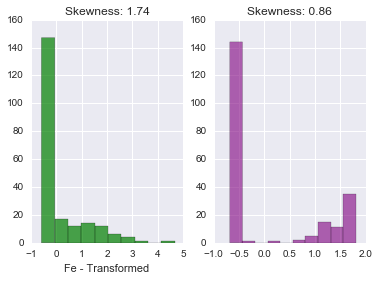

In [28]:
classes = X.columns.values

# This will contain the unskewed features
X_unsk = pd.DataFrame()

# looping through the 
for c in classes:
    scaled = preprocessing.scale(X[c]) 
    boxcox_scaled = preprocessing.scale(boxcox(X[c] + np.max(np.abs(X[c]) +1) )[0])
    
    # Populating 
    X_unsk[c] = boxcox_scaled
    
    #Next We calculate Skewness using skew in scipy.stats
    skness = skew(scaled)
    boxcox_skness = skew(boxcox_scaled)
    
    #We draw the histograms 
    figure = plt.figure()
    # First the original data shape
    figure.add_subplot(121)   
    plt.hist(scaled,facecolor='green',alpha=0.7) 
    plt.xlabel(c + " - Transformed") 
    plt.title("Skewness: {0:.2f}".format(skness)) 
    
    # then the unskewed
    figure.add_subplot(122) 
    plt.hist(boxcox_scaled,facecolor='purple',alpha=0.6) 
    plt.title("Skewness: {0:.2f}".format(boxcox_skness)) 

    plt.show()


# Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
import itertools

Confusion Natrix, Without Normalization
[[19  6  0  0  0  0]
 [ 3 19  1  1  0  1]
 [ 4  0  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  2  1]
 [ 0  1  0  0  0  4]]


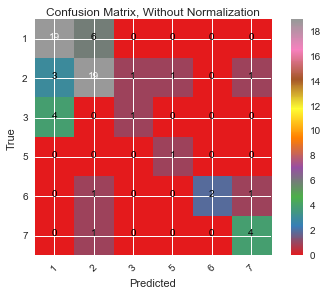

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Set1):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).round(decimals=2)
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Natrix, Without Normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

cnf_matrix = confusion_matrix(y_ts.values, pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.sort(y_ts.unique()), normalize=False,
                      title='Confusion Matrix, Without Normalization')


# Conclusions

Based off the information that is given, it is far from being perfect to define a decent classifier on the glass material. 